## Name:
## ID: 223000
## Section:   8MA1

# Step 1: Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define Functions

In [2]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.
    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.
    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image


def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.
    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()

# Step 3: Import the image and set the parameters

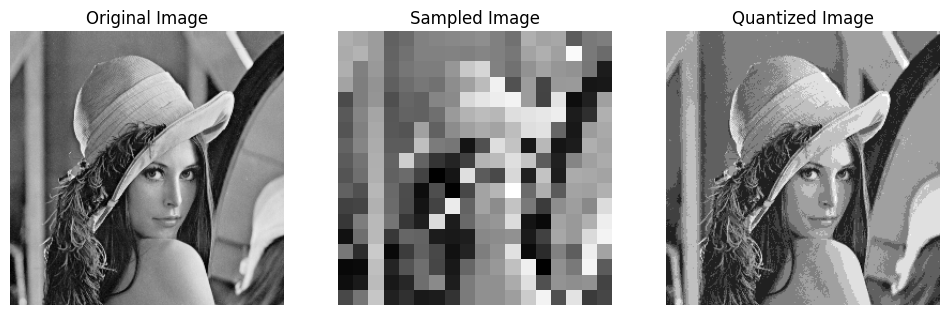

In [3]:
image_path='images/lena_gray_256.tif'
sampling_factor = 14
quantization_levels = 9

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)



# Arithmetic Operations

from PIL import Image
img1=Image.open('images/lena_gray_256.tif')
img2=Image.open ('images/cameraman.tif')

resize=(400,400)
img1=img1.resize(resize,Image.Resampling.LANCZOS)
img2=img2.resize(resize,Image.Resampling.LANCZOS)

im1arr=np.asarray(img1)
im2arr=np.asarray(img2)

addition= im1arr + im2arr
resultImage = Image.fromarray(addition)
resultImage.show()

# Sets and Logical Operations

# img3=Image.open('../images/A.png')
# img3.show()
# img4=Image.open('../images/B.png')
# img4.show()

# resize=(400,400)
# img3=img3.resize(resize,Image.Resampling.LANCZOS)
# img4=img4.resize(resize,Image.Resampling.LANCZOS)

# im3arr=np.asarray(img3)
# im4arr=np.asarray(img4)

# union=im4arr|im3arr
# resultImage2=Image.fromarray(union)
# resultImage2.show()

# Task 1: Change the sampling and quantization parameters and observe the effects.

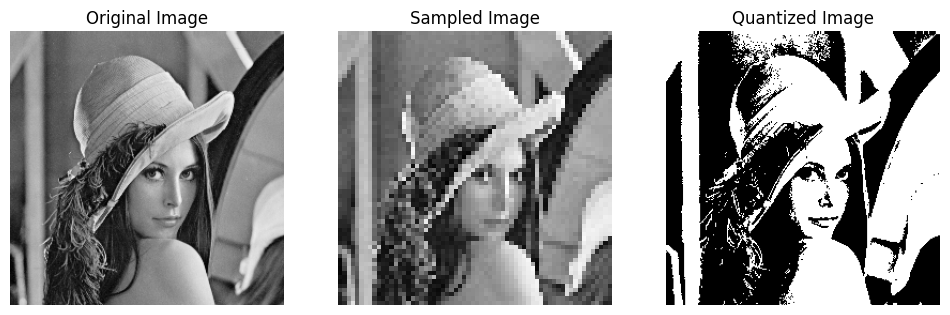

In [4]:
image_path='images/lena_gray_256.tif'
sampling_factor = 4
quantization_levels = 2

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)

# Task 2: Read two images, convert them into an array, and perform the following operations on them. 

## Task 2.1: Subtract two images and display the result.

In [5]:
img1=Image.open('images/lena_gray_256.tif').convert('L')
img2=Image.open ('images/cameraman.tif').convert('L')

# img1= cv2.imread('images/lena_gray_256.tif')
# img2 = cv2.imread('images/cameraman.tif', )

resize=(400,400)
img1=img1.resize(resize,Image.Resampling.LANCZOS)
img2=img2.resize(resize,Image.Resampling.LANCZOS)

im1arr=np.asarray(img1)
im2arr=np.asarray(img2)

result = im1arr - im2arr
result_image = Image.fromarray(result)
# result_image.show()

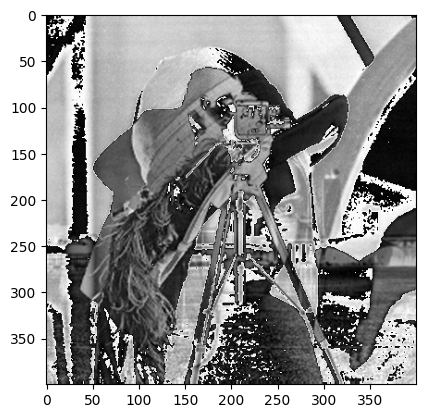

In [6]:
plt.imshow(result, cmap='gray')

## Task 2.2: Add one image with a constant value of 175 and display it.

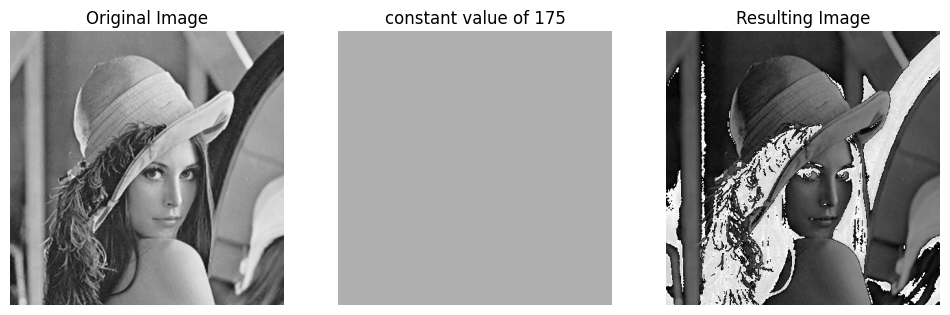

In [7]:
# I used the unit8 dtype because this is a grayscale image, and also to show the overflow...
# ...  behavior when adding 2 images and the sum of the pixels is greater than 255
constant_image = np.ones((400, 400), dtype=np.uint8) * 175    # unit8 allows values in the range [0, 255]
sum_image = im1arr + constant_image

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(im1arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
# If I didn't specify that the lumenosity value is between 0 and 255, the image is displayed black.
plt.imshow(constant_image, cmap='gray', vmin=0, vmax=255) 
plt.title('constant value of 175')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sum_image, cmap='gray')
plt.title('Resulting Image')
plt.axis('off')

plt.show()

## Task 2.3: Apply the set difference operation on two Gray-Scale images. 

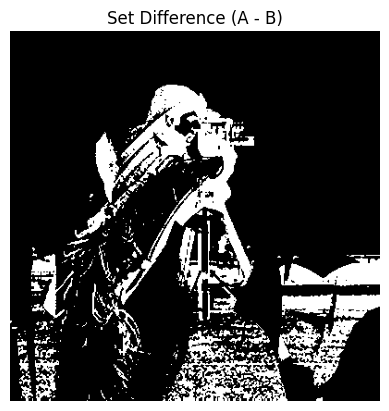

In [8]:
# Convert to binary (threshold)
_, img1_bin = cv2.threshold(im1arr, 127, 255, cv2.THRESH_BINARY)
_, img2_bin = cv2.threshold(im2arr, 127, 255, cv2.THRESH_BINARY)

# Set Difference (A - B)
difference = cv2.bitwise_and(img1_bin, cv2.bitwise_not(img2_bin))

plt.imshow(difference, cmap='gray')
plt.title("Set Difference (A - B)")
plt.axis('off')
plt.show()


## Task 2.4: Apply the symmetric difference operation on two Gray-Scale images.

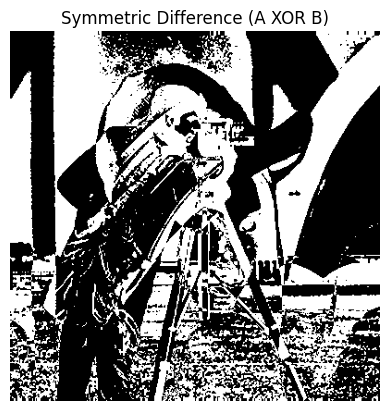

In [10]:
# Symmetric Difference (XOR)
symmetric_diff = cv2.bitwise_xor(img1_bin, img2_bin)

plt.imshow(symmetric_diff, cmap='gray')
plt.title("Symmetric Difference (A XOR B)")
plt.axis('off')
plt.show()


## Task 2.5: Apply Intersection operations on two Gray-Scale images.

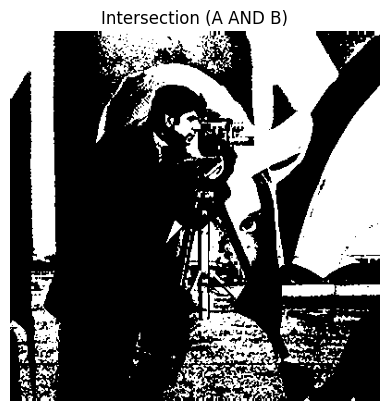

In [11]:
# Intersection (AND)
intersection = cv2.bitwise_and(img1_bin, img2_bin)

plt.imshow(intersection, cmap='gray')
plt.title("Intersection (A AND B)")
plt.axis('off')
plt.show()
